Data Preparation
Goal: Prepare the data you’ll use for portfolio analysis.

Load price data (e.g., from Yahoo Finance or CSVs).

Clean and align timestamps, remove NaNs, and compute daily returns.

Optionally: add market-cap weights if available.



In [1]:
import yfinance as yf
from plotly.express.trendline_functions import rolling

In [2]:
from datetime import date

start = date(2020, 1, 1)
end = date.today()

In [3]:
tickers = ["AAPL", "MSFT", "GOOG", "META"]
stocks = yf.download(tickers, start=start, end=end, auto_adjust=False)
stocks = stocks[["Close"]]
stocks

[*********************100%***********************]  4 of 4 completed


Price            Close                                    
Ticker            AAPL        GOOG        META        MSFT
Date                                                      
2020-01-02   75.087502   68.368500  209.779999  160.619995
2020-01-03   74.357498   68.032997  208.669998  158.619995
2020-01-06   74.949997   69.710503  212.600006  159.029999
2020-01-07   74.597504   69.667000  213.059998  157.580002
2020-01-08   75.797501   70.216003  215.220001  160.089996
...                ...         ...         ...         ...
2025-11-06  269.769989  285.339996  618.940002  497.100006
2025-11-07  268.470001  279.700012  621.710022  496.820007
2025-11-10  269.429993  290.589996  631.760010  506.000000
2025-11-11  275.250000  291.739990  627.080017  508.679993
2025-11-12  273.470001  287.429993  609.010010  511.140015

[1475 rows x 4 columns]

<Axes: title={'center': 'Stock Prices over the last five years'}, xlabel='Date'>

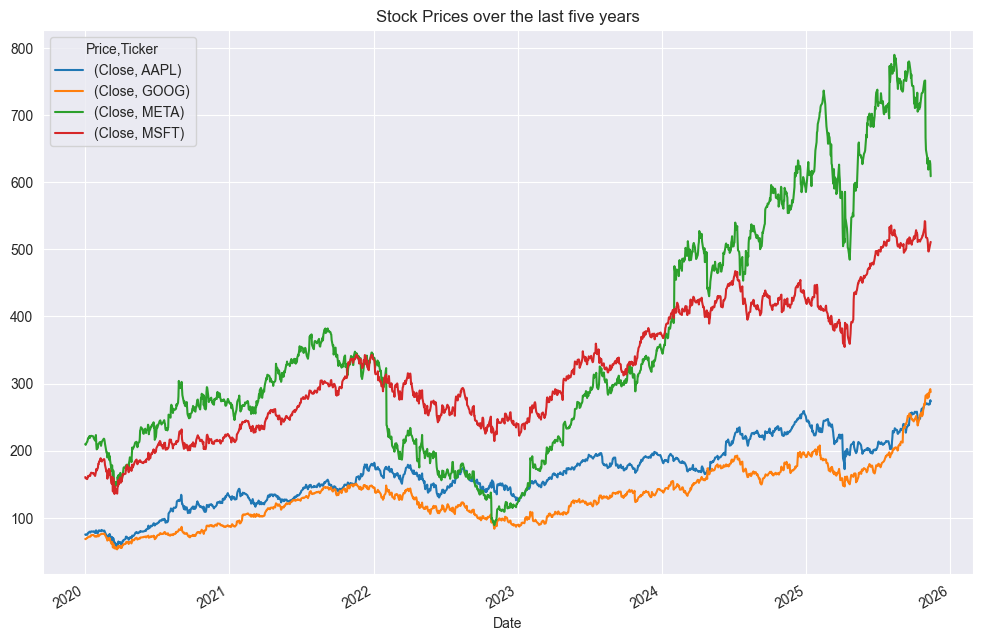

In [4]:
stocks.plot(title = "Stock Prices over the last five years", figsize = (12, 8))

In [5]:
import numpy as np

In [6]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns = log_returns.dropna()
log_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009770 -0.004919 -0.005305 -0.012530
2020-01-06  0.007937  0.024358  0.018658  0.002581
2020-01-07 -0.004714 -0.000624  0.002161 -0.009160
2020-01-08  0.015958  0.007850  0.010087  0.015803
2020-01-09  0.021018  0.010984  0.014210  0.012416
...              ...       ...       ...       ...
2025-11-06 -0.001371  0.002070 -0.027112 -0.020035
2025-11-07 -0.004831 -0.019964  0.004465 -0.000563
2025-11-10  0.003569  0.038196  0.016036  0.018309
2025-11-11  0.021371  0.003950 -0.007435  0.005282
2025-11-12 -0.006488 -0.014884 -0.029239  0.004824

[1474 rows x 4 columns]

In [7]:
lin_returns = stocks / stocks.shift(1) - 1
lin_returns = lin_returns.dropna()
lin_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009722 -0.004907 -0.005291 -0.012452
2020-01-06  0.007968  0.024657  0.018834  0.002585
2020-01-07 -0.004703 -0.000624  0.002164 -0.009118
2020-01-08  0.016086  0.007880  0.010138  0.015928
2020-01-09  0.021241  0.011044  0.014311  0.012493
...              ...       ...       ...       ...
2025-11-06 -0.001370  0.002072 -0.026747 -0.019836
2025-11-07 -0.004819 -0.019766  0.004475 -0.000563
2025-11-10  0.003576  0.038935  0.016165  0.018478
2025-11-11  0.021601  0.003957 -0.007408  0.005296
2025-11-12 -0.006467 -0.014773 -0.028816  0.004836

[1474 rows x 4 columns]

Portfolio Construction
Goal: Build different portfolio types.

Equal-weighted portfolio: assign the same weight to each stock.

Market-cap weighted portfolio: assign weights proportional to each stock’s market capitalization.

Compute daily portfolio returns by multiplying asset returns by weights.

In [8]:
equal_weights = 1/len(tickers)

In [9]:
import pandas as pd

In [10]:
portfolio_returns_equal_weights = (lin_returns * equal_weights).sum(axis=1)
portfolio_returns_equal_weights = pd.DataFrame(portfolio_returns_equal_weights, columns = ["Equally-weighted Portfolio Returns"])
portfolio_returns_equal_weights

,Equally-weighted Portfolio Returns
Date,
2020-01-03,-0.008093
2020-01-06,0.013511
2020-01-07,-0.003070
2020-01-08,0.012508
2020-01-09,0.014772
...,...
2025-11-06,-0.011470
2025-11-07,-0.005168
2025-11-10,0.019288


<Axes: title={'center': 'Equally-weighted Portfolio Returns'}, xlabel='Date'>

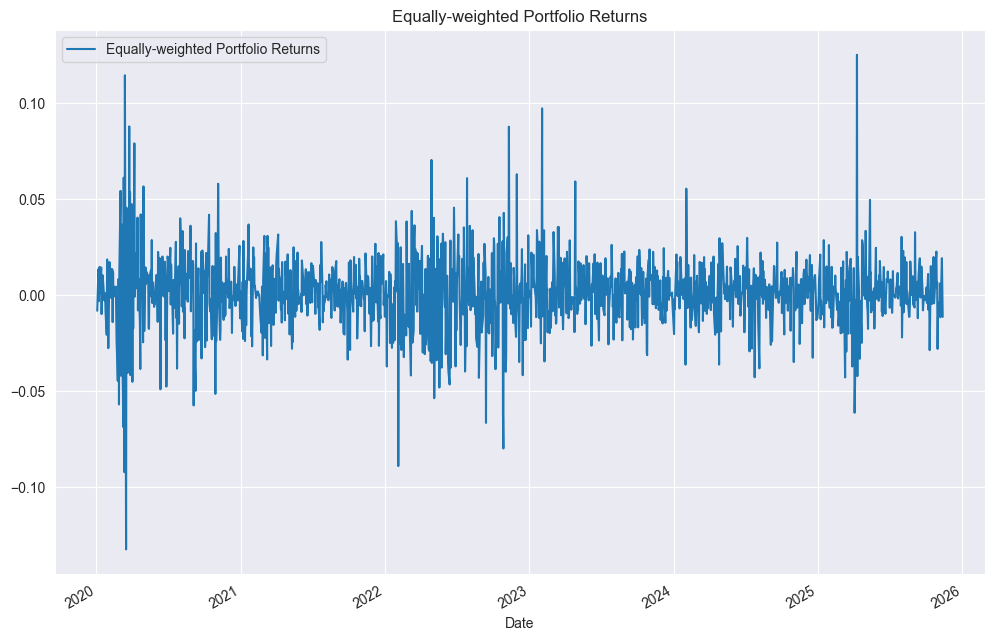

In [11]:
portfolio_returns_equal_weights.plot(title = "Equally-weighted Portfolio Returns", figsize = (12, 8))

In [12]:
import pandas as pd
import numpy as np

marketCap = []
for i in tickers:
    cap = yf.Ticker(i).info["marketCap"]
    marketCap.append(cap)
marketCap = pd.DataFrame(marketCap, index=tickers, columns=["Market Caps"])
marketCap

,Market Caps
AAPL,4032031096832
MSFT,3770965557248
GOOG,3366858522624
META,1528687099904


In [13]:
marketCap_weights = marketCap/marketCap.sum()
print(marketCap_weights)

      Market Caps
AAPL     0.317519
MSFT     0.296961
GOOG     0.265137
META     0.120383


In [14]:
portfolio_returns_marketCap_weights = (lin_returns.droplevel(0, axis=1) @ marketCap_weights).sum(axis=1)
portfolio_returns_marketCap_weights= pd.DataFrame(portfolio_returns_marketCap_weights, columns = ["Market-weighted Portfolio Returns"])
portfolio_returns_marketCap_weights

,Market-weighted Portfolio Returns
Date,
2020-01-03,-0.008723
2020-01-06,0.012102
2020-01-07,-0.004106
2020-01-08,0.013148
2020-01-09,0.015105
...,...
2025-11-06,-0.008996
2025-11-07,-0.006399
2025-11-10,0.018891


<Axes: title={'center': 'Market-weighted Portfolio Returns'}, xlabel='Date'>

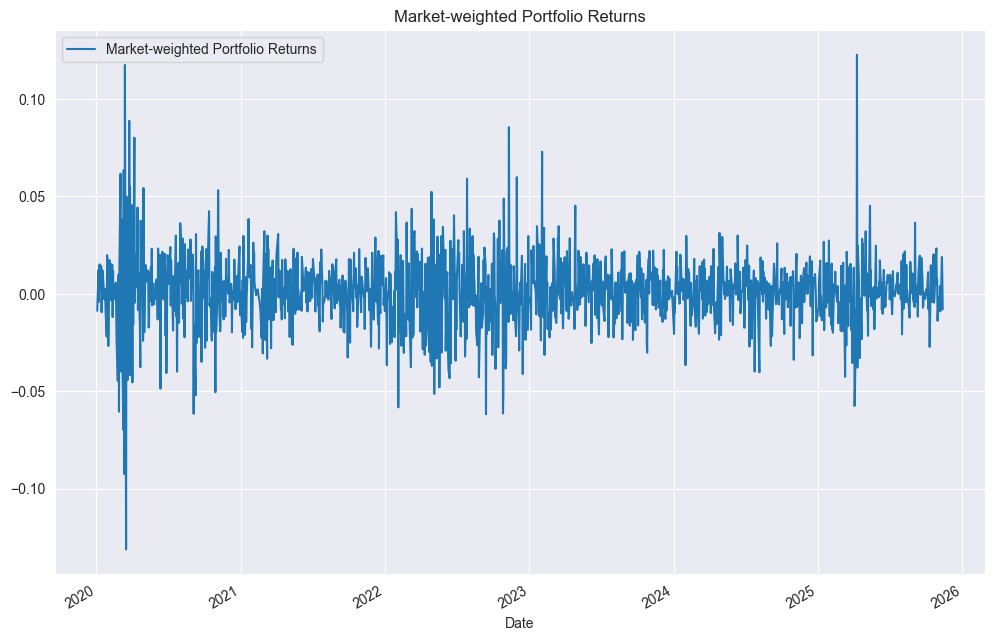

In [15]:
portfolio_returns_marketCap_weights.plot(title = "Market-weighted Portfolio Returns", figsize = (12, 8))

<Axes: title={'center': 'Weighted Portfolio Returns'}, xlabel='Date'>

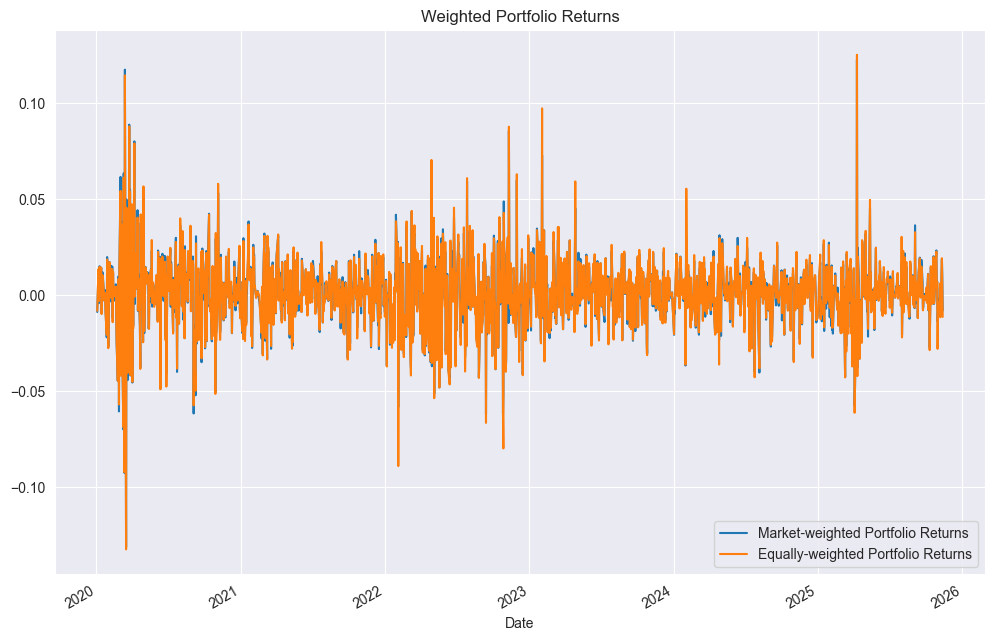

In [16]:
combined = pd.concat([portfolio_returns_marketCap_weights,portfolio_returns_equal_weights], axis=1)
combined.plot(title = "Weighted Portfolio Returns", figsize = (12, 8))

Performance Metrics
Goal: Measure risk and return.

Compute annualized return and annualized volatility.

Calculate Sharpe ratio (return per unit of risk).

Calculate Sortino ratio (return per unit of downside risk).

Compute maximum drawdown and plot cumulative returns.



In [17]:
y_avg_return = pd.DataFrame( index = ["Average Yearly Returns"] )
for i in log_returns:
    y_avg_return[i] = np.mean(log_returns[i])*250
y_avg_return

,"(Close, AAPL)","(Close, GOOG)","(Close, META)","(Close, MSFT)"
Average Yearly Returns,0.219223,0.243566,0.180762,0.196337


In [18]:
mu_y=(log_returns.mean()*250).to_frame().T
sigma_y = (log_returns.std()*np.sqrt(250)).to_frame().T
y_stats = pd.concat([mu_y,sigma_y])
y_stats.index = ["Average Yearly Returns", "Yearly Volatility"]
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.219223  0.243566  0.180762  0.196337
Yearly Volatility       0.319004  0.322279  0.444021  0.296128

In [19]:
sharpe_ratio  = (y_stats.loc["Average Yearly Returns"]/y_stats.loc["Yearly Volatility"]).to_frame().T
sharpe_ratio.index = ["Sharpe Ratio"]
y_stats = pd.concat([y_stats,sharpe_ratio])
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.219223  0.243566  0.180762  0.196337
Yearly Volatility       0.319004  0.322279  0.444021  0.296128
Sharpe Ratio            0.687211  0.755763  0.407103  0.663014

In [20]:
negative_returns = log_returns[log_returns<0]
downside_vol = (negative_returns.std()*np.sqrt(250)).to_frame().T
downside_vol.index = ["Downside Volatility"]
y_stats = pd.concat([y_stats,downside_vol], axis=0)
y_stats


Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.219223  0.243566  0.180762  0.196337
Yearly Volatility       0.319004  0.322279  0.444021  0.296128
Sharpe Ratio            0.687211  0.755763  0.407103  0.663014
Downside Volatility     0.233702  0.236906  0.363596  0.219108

In [21]:
sortino_vol = (y_stats.loc["Average Yearly Returns"]/y_stats.loc["Downside Volatility"]).to_frame().T
sortino_vol.index = ["Sortino Ratio"]
y_stats = pd.concat([y_stats,sortino_vol], axis=0)
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.219223  0.243566  0.180762  0.196337
Yearly Volatility       0.319004  0.322279  0.444021  0.296128
Sharpe Ratio            0.687211  0.755763  0.407103  0.663014
Downside Volatility     0.233702  0.236906  0.363596  0.219108
Sortino Ratio           0.938044  1.028114  0.497153  0.896074

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

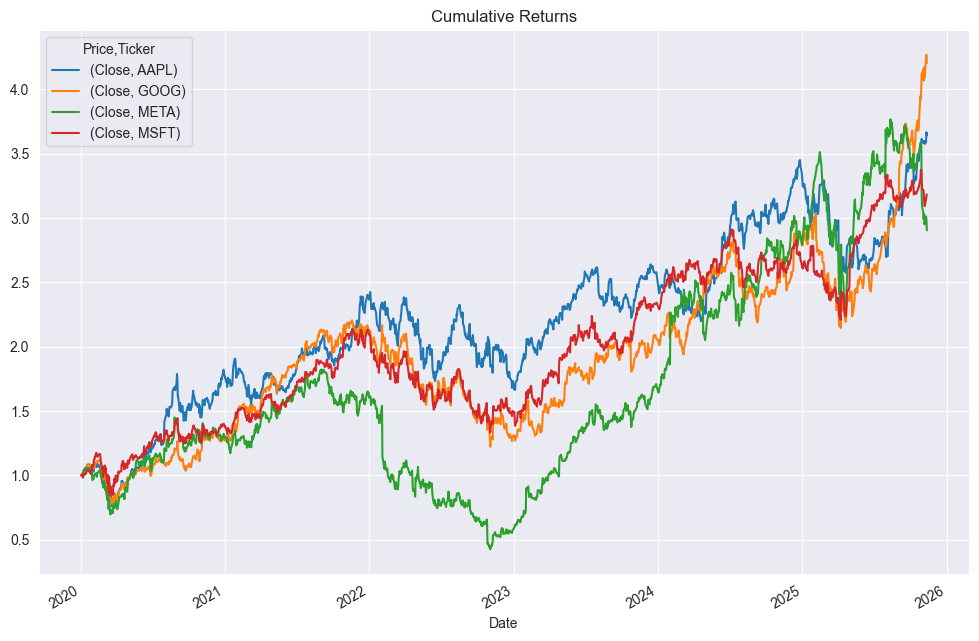

In [29]:
cumulative_returns = (1 + lin_returns).cumprod()
cumulative_returns.iloc[0] = 1
cumulative_returns.plot(title = "Cumulative Returns", figsize = (12, 8))

<Axes: title={'center': 'Max Drowdown'}, xlabel='Date'>

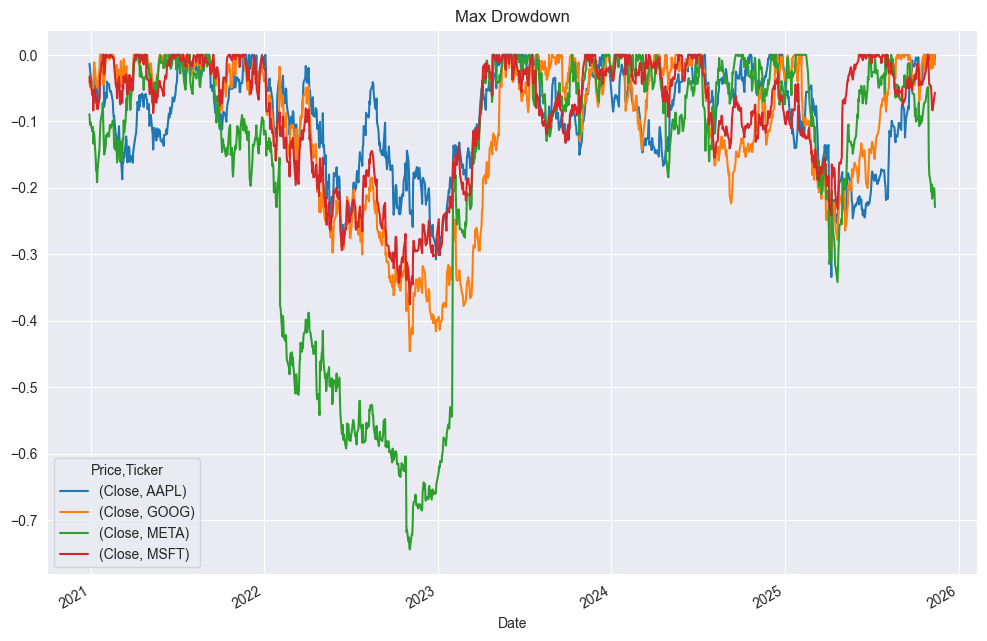

In [30]:
rolling_max = cumulative_returns.rolling(window=250).max()
max_drowdown = cumulative_returns/rolling_max - 1
max_drowdown.plot(title = "Max Drowdown", figsize = (12, 8))

<Axes: title={'center': 'Cumulative Returns of the Market Cap-Weighted Portfolio'}, xlabel='Date'>

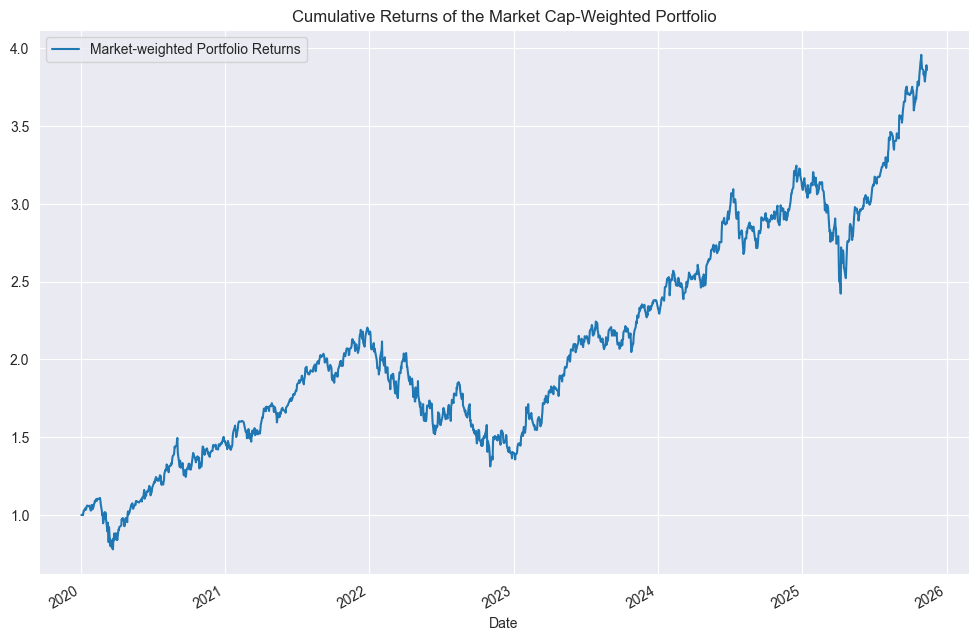

In [33]:
cumulative_returns_market_weighted_portfolio = (1 + portfolio_returns_marketCap_weights).cumprod()
cumulative_returns_market_weighted_portfolio.iloc[0] = 1
cumulative_returns_market_weighted_portfolio.plot(title = "Cumulative Returns of the Market Cap-Weighted Portfolio", figsize = (12, 8))

<Axes: title={'center': 'Max Drowdown of the Portfolio weighted by Market Cap'}, xlabel='Date'>

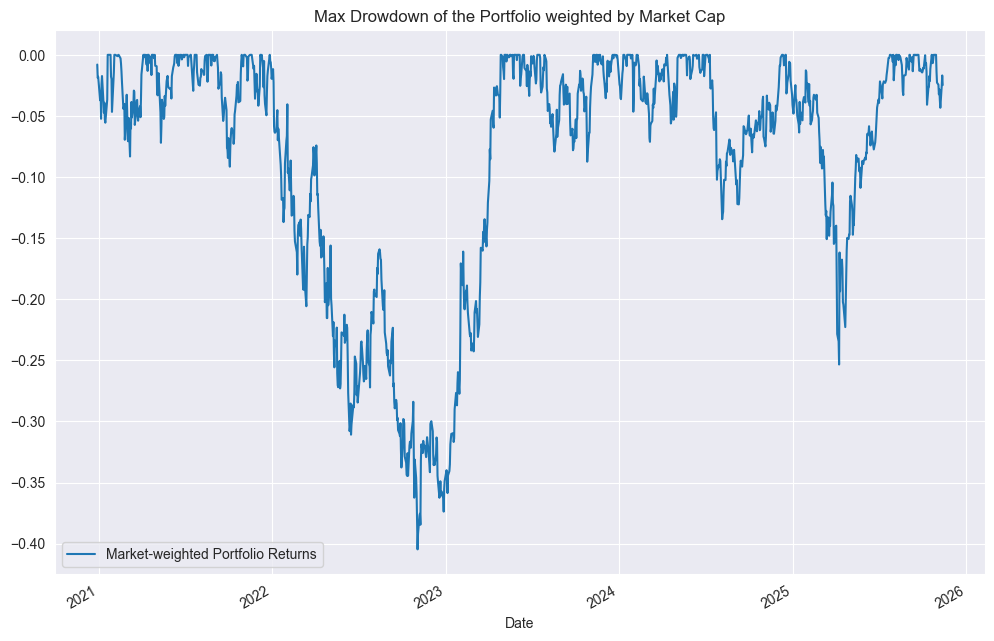

In [34]:
rolling_max_market_weighted_portfolio = cumulative_returns_market_weighted_portfolio.rolling(window=250).max()
max_drowdown_market_weighted_portfolio = cumulative_returns_market_weighted_portfolio/rolling_max_market_weighted_portfolio - 1
max_drowdown_market_weighted_portfolio.plot(title = "Max Drowdown of the Portfolio weighted by Market Cap", figsize = (12, 8))

Risk Metrics
Goal: Assess tail risk and loss potential.

Implement historical Value at Risk (VaR) at chosen confidence levels (e.g., 95%, 99%).

Compute Conditional VaR (CVaR) — the expected loss beyond VaR.

Compare historical vs parametric (normal assumption) VaR estimates.

In [36]:
x = (portfolio_returns_marketCap_weights - portfolio_returns_marketCap_weights.mean()) / portfolio_returns_marketCap_weights.std()

,Market-weighted Portfolio Returns
count,1.474000e+03
mean,-1.205127e-17
std,1.000000e+00
min,-7.404270e+00
25%,-4.624813e-01
50%,1.429855e-02
75%,5.244022e-01
max,6.808728e+00


In [40]:
x.describe()

,Market-weighted Portfolio Returns
count,1.474000e+03
mean,-1.205127e-17
std,1.000000e+00
min,-7.404270e+00
25%,-4.624813e-01
50%,1.429855e-02
75%,5.244022e-01
max,6.808728e+00


In [37]:
min_x = min(x)
max_x = max(x)

In [38]:
print(min_x, type(min_x))
print(max_x, type(max_x))

Market-weighted Portfolio Returns <class 'str'>
Market-weighted Portfolio Returns <class 'str'>


In [43]:
min_x = float(min_x)
max_x = float(max_x)

ValueError: could not convert string to float: 'Market-weighted Portfolio Returns'

In [44]:
min_x = float(np.nanmin(x.to_numpy()))
max_x = float(np.nanmax(x.to_numpy()))
# or, if x is a DataFrame instead of a Series:
# min_x = float(x.min().min()); max_x = float(x.max().max())

In [45]:
empirical_support = np.linspace(min_x, max_x, 100)
empirical_support

array([-7.40427031, -7.26070467, -7.11713903, -6.97357339, -6.83000776,
       -6.68644212, -6.54287648, -6.39931084, -6.2557452 , -6.11217957,
       -5.96861393, -5.82504829, -5.68148265, -5.53791701, -5.39435138,
       -5.25078574, -5.1072201 , -4.96365446, -4.82008882, -4.67652319,
       -4.53295755, -4.38939191, -4.24582627, -4.10226063, -3.95869499,
       -3.81512936, -3.67156372, -3.52799808, -3.38443244, -3.2408668 ,
       -3.09730117, -2.95373553, -2.81016989, -2.66660425, -2.52303861,
       -2.37947298, -2.23590734, -2.0923417 , -1.94877606, -1.80521042,
       -1.66164479, -1.51807915, -1.37451351, -1.23094787, -1.08738223,
       -0.94381659, -0.80025096, -0.65668532, -0.51311968, -0.36955404,
       -0.2259884 , -0.08242277,  0.06114287,  0.20470851,  0.34827415,
        0.49183979,  0.63540542,  0.77897106,  0.9225367 ,  1.06610234,
        1.20966798,  1.35323361,  1.49679925,  1.64036489,  1.78393053,
        1.92749617,  2.07106181,  2.21462744,  2.35819308,  2.50

In [50]:
from scipy.stats import norm

In [48]:
def F_hat_fct(portfolio, cutoff):
    return np.sum(portfolio<=cutoff)/len(portfolio)

In [51]:
Phi_vals = np.zeros(len(empirical_support))
F_hat_vals = np.zeros(len(empirical_support))

for i in range(len(empirical_support)):
    Phi_vals[i] = norm.cdf(empirical_support[i])
    F_hat_vals[i] = F_hat_fct(x, empirical_support[i])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/dn/4wqw68cj32z10qplr1wpk7gc0000gn/T/ipykernel_6472/1932526840.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  F_hat_vals[i] = F_hat_fct(x, empirical_support[i])


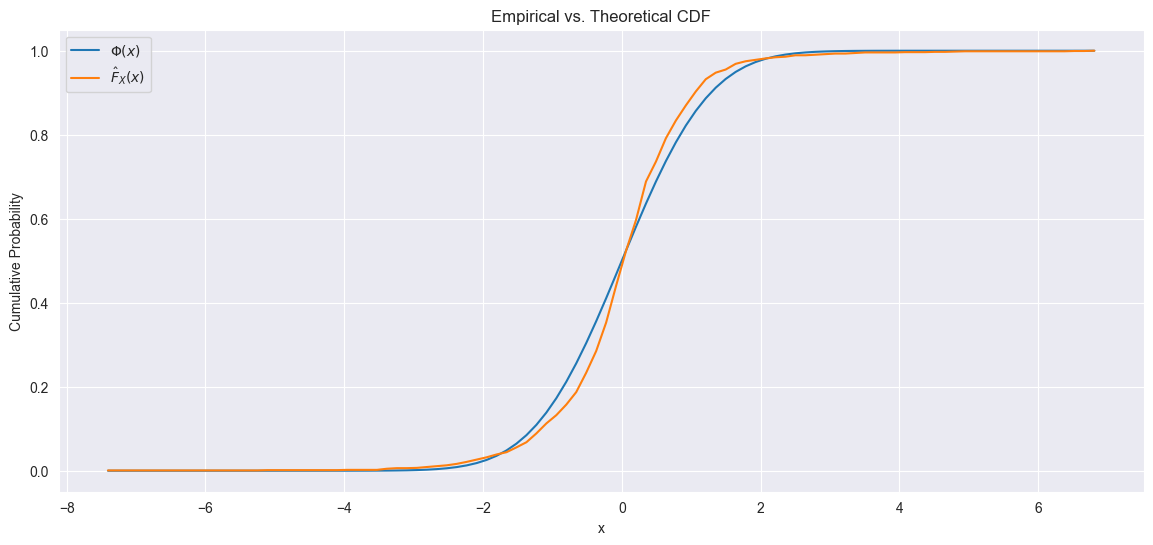

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.grid(True)

plt.plot(empirical_support, Phi_vals, label=r"$\Phi(x)$")
plt.plot(empirical_support, F_hat_vals, label=r"$\hat{F}_X(x)$")

plt.ylabel("Cumulative Probability")
plt.title("Empirical vs. Theoretical CDF")
plt.legend()
plt.xlabel("x")
plt.show()

In [52]:
epsilon = (empirical_support[1] - empirical_support[0])/2

phi_vals = np.zeros( len(empirical_support) )
f_hat_vals = np.zeros( len(empirical_support) )

for i in range(len(empirical_support)):
  phi_vals[i] = norm.pdf(empirical_support[i])
  f_hat_vals[i] = (F_hat_fct(x, empirical_support[i]+epsilon)-F_hat_fct(x, empirical_support[i]-epsilon) )/(2*epsilon)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/dn/4wqw68cj32z10qplr1wpk7gc0000gn/T/ipykernel_6472/1846613767.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  f_hat_vals[i] = (F_hat_fct(x, empirical_support[i]+epsilon)-F_hat_fct(x, empirical_support[i]-epsilon) )/(2*epsilon)


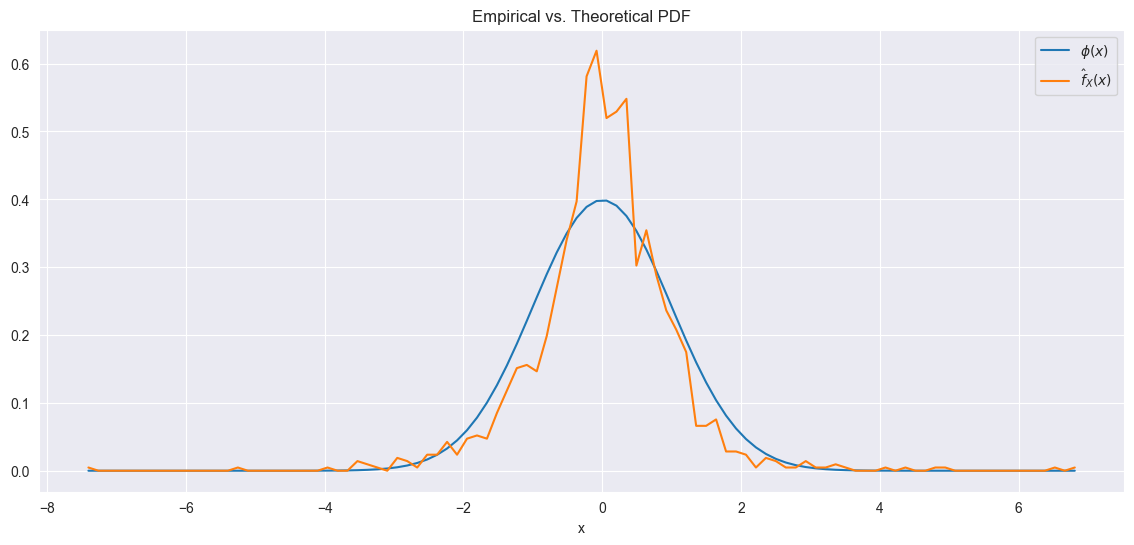

In [54]:
plt.figure(figsize=(14, 6))
plt.grid(True)

plt.plot(empirical_support, phi_vals, label=r"$\phi(x)$")
plt.plot(empirical_support, f_hat_vals, label=r"$\hat{f}_X(x)$")

plt.legend()
plt.title("Empirical vs. Theoretical PDF")
plt.xlabel("x")
plt.show()

In [65]:
def VaR(portfolio, confidence_level):
    return np.percentile(portfolio, 1 - confidence_level)


In [66]:
VaR(portfolio_returns_marketCap_weights, 0.95)

np.float64(-0.1027694124946708)

In [77]:
print(f"Historical VaR (95%) = {VaR(portfolio_returns_marketCap_weights, 0.95):.3f}")

VaR (95%) = -0.103


In [87]:
cVaR = np.mean(portfolio_returns_marketCap_weights <= VaR(portfolio_returns_marketCap_weights, 0.95))
cVaR

np.float64(0.0006784260515603799)

In [105]:
def cVaR(portfolio, confidence_level = 0.95):
    var = np.percentile(portfolio, 1 - confidence_level)
    cvar = (portfolio[portfolio <= var]).mean()
    return float(cvar.iloc[0])

In [106]:
cVaR(portfolio_returns_marketCap_weights, 0.95)

-0.1312075720114198

In [108]:
print(f"Historical Conditional VaR = {cVaR(portfolio_returns_marketCap_weights):.3f}")

Historical Conditional VaR = -0.131


In [115]:
def norm_var(portfolio, confidence_level = 0.95):
    var = (norm.ppf(1 - confidence_level))*portfolio.std() + portfolio.mean()
    return var.iloc[0]

In [116]:
norm_var(portfolio_returns_marketCap_weights, 0.95)

np.float64(-0.028310550919059766)

In [117]:
def norm_cvar(portfolio, confidence_level=0.95):
    var = (norm.ppf(1 - confidence_level)) * portfolio.std() + portfolio.mean()
    cvar = (portfolio[portfolio <= var]).mean()
    return cvar.iloc[0]

In [122]:
print(f"Parametric (Normal) VaR = {norm_var(portfolio_returns_marketCap_weights, 0.95):.3f}; "
      f"Parametric (Normal) Conditional Var = {norm_cvar(portfolio_returns_marketCap_weights, 0.95):.3f}; "
      f"Historical VaR = {VaR(portfolio_returns_marketCap_weights, 0.95):.3f}; "
      f"Historical Conditional Var = {cVaR(portfolio_returns_marketCap_weights, 0.95):.3f}")

Parametric (Normal) VaR = -0.028; Parametric (Normal) Conditional Var = -0.042; Historical VaR = -0.103; Historical Conditional Var = -0.131


Portfolio Optimization
Goal: Find optimal portfolios along the efficient frontier.

Use mean-variance optimization to minimize volatility for a given expected return.

Implement with scipy.optimize or cvxpy.

Plot the efficient frontier, mark the tangency portfolio (max Sharpe).



Backtesting
Goal: Evaluate strategy performance over time.

Simulate monthly rebalancing of portfolios (equal-weighted and optimized).

Record metrics over time (returns, volatility, Sharpe, drawdown).

Compare the performance of different strategies.



Function Modularization
Goal: Turn repeated operations into reusable code.

Write functions for:

Portfolio return computation

Sharpe, Sortino, and drawdown

VaR and CVaR

Optimization and efficient frontier

Keep your notebook clean and organized.

Visualization and Reporting
Goal: Present your findings clearly.

Plot cumulative returns, rolling Sharpe, and drawdowns.

Display VaR/CVaR distributions and efficient frontier.

Summarize metrics in a clean DataFrame or table.